<center>
<img src='./img/nsidc_logo.png'/>

# **IceFlow**
### Point Cloud Data Access
</center>

---
<div>
<img align="right" width="50%" height="200px" src='./img/vaex.png'/>
</div>

# 1. IceFlow Introduction
This Jupyter notebook is an interactive document to teach students and researchers interested in cryospheric sciences how to access and work with airborne altimetry and related data sets from NASA’s [IceBridge](https://www.nasa.gov/mission_pages/icebridge/index.html) mission, and satellite altimetry data from [ICESat/GLAS](https://icesat.gsfc.nasa.gov/icesat/) and [ICESat-2](https://icesat-2.gsfc.nasa.gov/) using the ***IceFlow*** API. Accessing and combining data from these different missions can be difficult as file formats and coordinate reference systems changed over time. *IceFlow* is a Python library and API developed at NSIDC allowing easy data access from across these various NASA missions. 


## **1.1 Knowledge Requirements**

To get the most out of this notebook you should be familiar with Python and its geoscience stack but this notebook allows also the less experienced Python user to learn how to use *IceFlow* to access altimetry data. Most of the "heavy lifting" is done with our *IceFlow* client code so you don't necessarily need to know a lot about these libraries. If you feel like learning more about geoscience and Python, you can find great tutorials by CU Boulder's Earth Lab here: [Data Exploration and Analysis Lessons](https://www.earthdatascience.org/tags/data-exploration-and-analysis/) or by the Data Carpentry project: [Introduction to Geospatial Concepts](https://datacarpentry.org/organization-geospatial/)


The main Python packages/libraries that will be used in this notebook are:

 * [*requests*](https://requests.readthedocs.io/en/master/):
 HTTP library for Python, used to make requests
 * [*geopandas*](https://geopandas.org/):
 Library to simplify working with geospatial data in Python (using pandas) 
 * [*geojson*](https://github.com/jazzband/geojson):
 Functions for encoding and decoding GeoJSON formatted data in Python
 * [*h5py*](https://github.com/h5py/h5py):
 Pythonic wrapper around the [*HDF5 library](https://en.wikipedia.org/wiki/Hierarchical_Data_Format) 
 * [*matplotlib*](https://matplotlib.org/):
 Comprehensive library for creating static, animated, and interactive visualizations in Python
 * [*vaex*](https://github.com/vaexio/vaex):
 High performance Python library for lazy Out-of-Core dataframes (similar to *pandas*), to visualize and explore big tabular data sets
 * [*iPyLeaflet*](https://github.com/jupyter-widgets/ipyleaflet):
 Jupyter/Leaflet bridge enabling interactive maps in the Jupyter notebook
 * [*icepyx*](https://icepyx.readthedocs.io/en/latest/):
 Library for ICESat-2 data users


## **1.2 Learning Goals**

After completing this notebook and the companion [visualization and analysis notebook](./3_dataviz.ipynb) you will:
* Understand the basics about the data sets (pre-IceBridge, IceBridge, ICESat/GLAS and ICESat-2) served by *IceFlow*;
* Be able to access these data sets using the *IceFlow* user interface widget and the API;
* Be able to read and analyze the data using *IceFlow*.

> If you want to know what an API is, take a look at this video: ["What is an API?"](https://www.youtube.com/watch?v=s7wmiS2mSXY) 

This notebook contains three ***IceFlow* use cases**:
1. Accessing data with the *IceFlow* widget (Section 6.1)
2. Accessing data using the *IceFlow* API (Section 6.2)
3. Reading and plotting data (Section 6.3)

**Note:** Some data orders can take quite some time. Read more on estimated data download times in Section 6.1. If you run this notebook with the Binder, we recommend loading only very small data orders as the Binder will time out after ~10 minutes. For larger data orders run this notebook locally. 

**Important:** The three use cases can be run independently as the data needed in Section 6.3 is already preloaded.
 If you feel comfortable using code you don't need to use the map widget (Section 6.1) but you can directly jump to Section 6.2 (*IceFlow* API) or take a look at the [API usage notebook](./2_api.ipynb).


# **2. Why IceFlow**

### The Short Answer is **Data Harmonization**

In 2003, NASA launched the Ice, Cloud and Land Elevation Satellite mission with the Geoscience Laser Altimeter System (ICESat/GLAS) instrument onboard. Over the following six years, ICESat/GLAS collected valuable ice thickness data in the Polar Regions. Unfortunately, the ICESat/GLAS mission ended in 2009 before a follow-up mission could be launched. An airborne campaign called Operation IceBridge was funded to fill the gap and continue ice thickness measurements. Between 2009 and 2019, Operation IceBridge flew numerous campaigns over Greenland, the Antarctic ice sheets, and sea ice in the Arctic and Southern Ocean. In September 2018, ICESat-2 was launched to continue NASA's collection of ice, cloud and land elevation data.

The wealth of data from these three missions, as well as from the pre-IceBridge airborne altimetry missions, presents an opportunity to study the evolution of ice thickness over several decades. However, combining data from these missions presents several challenges:
* Data from the Airborne Topographic Mapper (ATM) flown during the IceBridge campaigns is stored in four different file formats. ICESat/GLAS and ICESat-2 data are also in different file formats. Therefore, the data needs to be harmonized, that means placed into similar formats before comparisons can be made.
* The coordinate reference systems used to locate measurements have changed over the years, as the Earth's surface is not static and changes shape. To account for these changes, terrestrial reference frames that relate latitude and longitude to points on the Earth are updated on a regular basis. Since the launch of ICESat/GLAS, the International Terrestrial Reference Frame [(ITRF)](https://www.iers.org/IERS/EN/DataProducts/ITRF/itrf.html) has been updated three times. The geolocation of a point measured at the beginning of the record and the end of the record is not the same even though the latitude and longitude is the same. These changes in geolocation need to be reconciled to allow meaningful comparisons within the long-term data record.

The *IceFlow* library grants easy access across the missions, harmonizing the data from the different file formats as well as corrects for changes in coordinate reference systems. A more detailed overview of these corrections can be found in [Applying Coordinate Transformations to Facilitate Data Comparison](corrections.ipynb).

# 3. Mission Overview

## **3.1 Pre-IceBridge**

The Airborne Topographic Mapper (ATM) is a conically-scanning laser altimeter that measures the surface topography of a swath of terrain directly beneath the path of an aircraft. ATM surveys can be used to detect surface changes. Differences of laser swaths surveyed over the same area but a few years apart can be used to estimate elevation changes between the first and second survey. Comparing the surveys conducted 1993-4 and 1998-9 resulted in the first comprehensive assessment of the mass balance change of the Greenland ice sheet ([Krabill et al., 1999](https://science.sciencemag.org/content/283/5407/1522), [2000](https://science.sciencemag.org/content/289/5478/428)).  ATM surveys can also be used to calibrate/validate satellite altimeter measurements (e.g. [Martin et al., 2005](https://atm.wff.nasa.gov/files/browser/ATM_Calibration_Procedures_and_Accuracy_Assessment_2012.pdf)).  The ATM was deployed on a wide variety of platforms, including the NASA P3, a Chilean Navy P3, a US Navy P3, the NASA DC8, the NCAR C-130, and a half-dozen Twin Otters to collected high quality topographic data. For a complete list of the ATM deployments visit [https://atm.wff.nasa.gov/deployments/](https://atm.wff.nasa.gov/deployments/)

## **3.2 ICESat/GLAS**

ICESat/GLAS was the benchmark Earth Observing System mission for measuring ice sheet mass balance, cloud and aerosol heights, as well as land topography and vegetation characteristics. From 2003 to 2009, the ICESat/GLAS mission provided multi-year elevation data for ice sheet mass balance as well as stratospheric cloud property information over polar areas. This mission also provided topographic and vegetation data from around the globe beyond the polar-specific ice height information over the Greenland and Antarctic ice sheets. Launched on 12 January 2003, after seven years in orbit and 18 laser-operation campaigns, the ICESat/GLAS science mission ended due to the failure of its primary instrument in 2009.


## **3.3 IceBridge**

The operation IceBridge was with its surveying flights from 2009 to 2019 the largest airborne survey of the Earth's polar ice. It has yielded an unprecedented three-dimensional view of the Arctic and Antarctic ice sheets, ice shelves and sea ice. The flights provide a yearly, multi-instrument look at the behavior of the rapidly changing features of the polar ice.
Data collected during Operation IceBridge helps scientists bridge the gap in polar satellite observations between ICESat/GLAS (2003-2009) and ICESat-2 (2018-present). Although the IceBridge data are not continuous its mission became critical for extending the ice altimetry time series in the Arctic and Antarctic, after ICESat/GLAS stopped collecting data in 2009.

IceBridge flights were generally conducted in March-May over Greenland and in October-November over Antarctica.

## **3.4 ICESat-2**

The ICESat-2 mission was designed to provide elevation data needed to determine ice sheet mass balance as well as vegetation canopy information. It provides topographic measurements of cities, lakes and reservoirs, oceans and land surfaces around the globe. The sole instrument on ICESat-2 is the Advanced Topographic Laser Altimeter System (ATLAS), a space-based Lidar. It was designed and built at Goddard Space Flight Center, with the laser generation and detection systems provided by Fibertek. ATLAS measures the travel time of laser photons from the satellite to Earth and back; travel times from multiple laser pulses are used to determine elevation data.

**Note:** Data from ICESat-2 is not accessed with the *IceFlow* library but we provide access to it within this notebook using the [*icepyx*](https://github.com/icesat2py/icepyx) library.

<p align="center">
<img style="align: center;" width="80%" src='./img/iceflow-coverage.jpg'/>
    <br>
    <b><center>Fig 2. IceFlow mission coverages</center></b>
</p>


# 4. Data Sets and their Spatial and Temporal Coverage

NSIDC provides a list of all available data sets within each mission including further mission information and documentation for each data set:
* [ICESat/GLAS data sets at NSIDC](https://nsidc.org/data/icesat/data.html)
* [Pre-IceBridge and IceBridge data sets at NSIDC](https://nsidc.org/data/icebridge/data_summaries.html)
* [ICESat-2 data sets at NSIDC](https://nsidc.org/data/icesat-2/data-sets)

The *IceFlow* library provides web services to order a spatial and temporal subset of the Lidar point cloud data. The following table describes the temporal and spatial coverage of all available data sets within *IceFlow* as well as their sensors and platforms used to acquire the data.

**Important:** The *IceFlow* library unifies ATM into one category, so when you request pre-IceBridge and IceBridge data you can have a more continuous coverage.


---


|Data Set| Spatial Coverage | Temporal Coverage| Mission  | Sensors  | IceFlow Name|
|--------|------------------|------------------|------------|---------|-------------|
|[BLATM L1B](https://nsidc.org/data/BLATM1B)| South: N:-53, S: -90, E:180, W:-180 <br> North: N:90, S: 60, E:180, W:-180 | 23 Jun. 1993 - 30 Oct. 2008 | Pre-IceBridge | ATM  | **ATM1B**
|[ILATM L1B V1](https://nsidc.org/data/ILATM1B/versions/1) | South: N:-53, S: -90, E:180, W:-180 <br> North: N:90, S: 60, E:180, W:-180 | 31 Mar. 2009 - 8 Nov. 2012  <br> (updated 2013) | IceBridge | ATM | **ATM1B**
|[ILATM L1B V2](https://nsidc.org/data/ILATM1B/versions/2)| South: N:-53, S: -90, E:180, W:-180 <br> North: N:90, S: 60, E:180, W:-180 | 20 Mar. 2013 - 16 May 2019  <br> (updated 2020)| IceBridge|ATM|**ATM1B**
|[ILVIS2](https://nsidc.org/data/ILVIS2)| North: N:90, S: 60, E:180, W:-180|25 Aug. 2017 - 20 Sept. 2017|IceBridge | ALTIMETERS, LASERS, LVIS |**ILVIS2**
|[GLAH06](https://nsidc.org/data/GLAH06/)| Global: N:86, S: -86, E:180, W:-180|20 Feb. 2003 - 11 Oct. 2009|ICESat/GLAS | ALTIMETERS, CD, GLAS, GPS, <br> GPS Receiver, LA, PC|**GLAH06**


--- 

**Note**: If you have questions about the data sets please refer to the user guides or contact NSIDC user services at nsidc@nsidc.org

# 5. NASA's Earthdata Credentials

To access data using the *IceFlow* library it is necessary to log into [Earthdata Login](https://urs.earthdata.nasa.gov/). To do this, enter your NASA Earthdata credentials in the next step after executing the following code cell.

**Note**: If you don't have NASA Earthdata credentials you have to register first at the link above. You don't need to be a NASA employee to register with NASA Earthdata!


In [ ]:
# Importing IceFlow client library
from iceflow.ui import IceFlowUI
# Instantiateing the client
client = IceFlowUI()
# You need to use your NASA Earthdata Credentials and verify that they work.
# Please click on set credentials and then see if authentication is successful by executing the next cell.
client.display_credentials()

In [ ]:
# This cell will verify if your credentials are valid. 
# This may take a little while, if it fails for some reason try again.
# NOTE: Wednesday mornings are usually downtime for NSIDC services and you might experience difficulties accessing data.
authorized = client.authenticate()
if authorized is None:
    print('Earthdata Login not successful')
else:
    print('Earthdata Login successful!')

**Note:** If the output of the previous cell is "You are logged into NASA Earthdata!", then you are ready to proceed with any of the three following *IceFlow* use cases (6.1, 6.2, 6.3).

# 6. IceFlow Use Cases
## 6.1 Accessing Data with the IceFlow Access Widget
The *IceFlow* access widget is a user interface tool to visualize flightpaths from IceBridge, draw a region of interest, set spatio-temporal parameters and place data orders to the *IceFlow* API without writing code.
The output of the operations performed in the widget can be seen in the log window (right-most icon at the bottom of your browser.) 
<img src='./img/log-icons.png'> or by selecting it on the View menu "Show log console"

**Note:** Currently the access widget is stateless, if you change any parameter you will have to redraw your bounding box or polygon. This is a temporary artifact.

In [ ]:
# Let's start with the user interface. We'll explain what this does next.
# You have two displaying options for the user interface:
# 'vertical' displays a sidecar widget, 'horizontal' renders the widget in this notebook.
# Note that depending on your screen size and resolution the 'vertical' display option may not work correctly.
# This is a current bug in the jupyter-widget that can not be solved within the scope of IceFlow.
client.display_map('horizontal', extra_layers=True)

### IceFlow User Interface (UI) Components
This user interface uses [*ipyleaflet*](https://blog.jupyter.org/interactive-gis-in-jupyter-with-ipyleaflet-52f9657fa7a) which allows us to draw
polygons or bounding boxes to delimit our area of interest. We can also edit and delete these geometries using the widget controls in the map.
<br> 
<br>**The following list describes all user interface data selection options:**

- **Hemisphere**: Choose which map projection you are going to use, you can pick global, north or south.

- **Data sets**: Choose one or more data sets from the selection. For more than one data set use "CTRL+Space" or "CTRL+Click" on Windows and Linux or "command+click" on a Mac. Note: ATM1B includes the 3 different ATM products (BLATM L1B, ILATM L1B v1, ILATM L1B V2), see the above table for more details.

- **ITRF (optional)**: Choose an International Terrestrial Reference Frame, for more details see [ITRF](corrections.ipynb).

- **Epoch (optional)**: Populate this field with the epoch value in which you want the coordinate reference systems to be based. This can only be applied if a ITRF is selected. (e.g. if you use 2010.1 and ITRF 2014 then all the points will be shifted to match the best ground representation as if they were in January 2010. This is compensating for plate tectonic motion.)

- **ICESat-2**: If you additionally want to place a data order for ICESat-2 data (using icepyx) utilizing the current parameters you need to select the short name code of the desired data set i.e. ATL06. 

- **Date Range**: This slider control allows you to select a start and end date of interest.

- **Inside Map options**: In the map part of the widget, you can zoom in and out, draw a polygon or bounding boxes and edit them to select an area of interest.  You can also turn on and off the layers that show IceBridge flights and Ice Velocities.

**The following list describes all user interface buttons:**

- The **Get Raw Granule Count** button will query [NASA's CMR](https://earthdata.nasa.gov/eosdis/science-system-description/eosdis-components/cmr) to get a granule count for the current parameters, you need to have a geometry and one or more data sets selected. The result of the query gets displayed in the log window. **Important:** Check the selected raw granule count before placing an order. As a rule of thumb, you can expect a wait time of approximately 10 minutes each 1 Gigabyte of data selected. Keep in mind to run this notebook locally (not with the Binder) if you have large data orders as the Binder will time out after approximately 10 minutes.

- The **Print Current Parameter** button displays the selected start and end time, bounding box and data set(s) in the log window.

- The **Place Data Order** button will submit an *IceFlow* order using the current user interface parameters, this is an **asynchronous** process, you will have to wait until the order is completed before you can work with the data or place a new order but this does not block you from exploring the rest of the notebook while waiting for the order to complete.

- The **Check Order Status** button will output the status of the order in the log window.

- The **Download Data Order** button will download the data from an order that has been completed.

**Notes**: 
* If you use the bounding box geometry in a polar projection, you'll notice a distortion due the nature of polar coordinates, if you prefer, you can use the global Mercator map to draw a bounding box without apparent distortion. The better option is to draw a polygon or enter your exact desired coordinates. [How to do that will be covered later in this tutorial.] 
* The calculated download size of these granules is an upper bound since *IceFlow* allows us to subset the data. 


### NASA Common Metadata Repository (CMR)

NASA's Common Metadata Repository (CMR) is a metadata system that catalogs all data and service metadata records for NASA's Earth Observing System Data and Information System (EOSDIS) and will be the authoritative management system for all EOSDIS metadata. These metadata records are registered, modified, discovered, and accessed through programmatic interfaces leveraging standard protocols and APIs. 

In short: NASA's CMR is a database for Earth-related data sets, in this case **all the data served by *IceFlow* is also indexed by CMR**

One **important** thing to notice here is that CMR has the location of the original data granules and they can be in multiple data formats and projections. The *IceFlow* tool simplifies the handling of these different data formats and projections. As CRM does not subset the data, the data size calculation for CMR granules is an upper bound.

In [ ]:
# Use the widget state to build spatio-temporal parameters
# Note: This gives you the same information as clicking the "Print Current Parameter" button.
# but it will show up right in this notebook under this code instead of inside the log window.
params = client.build_parameters()
params

In [ ]:
# You can query CMR to get an idea of data set coverages, granule numbers and approximate download size
# for the current set of selections.
# Note: This gives you the same information as clicking the "Get Raw Granule Count" button.
# but it will show up right in this notebook under this code instead of inside the log window.
# The granules and total size is an upper bound since CMR has full granules
# and IceFlow will subset them to only cover the area selected.
granules = client.query_cmr(params=params)

## 6.2 Accessing Data with the IceFlow API

A second option to access *IceFlow* data is programmatically using the API (without the user interface widget). 

In this example we are ordering data from the [Thwaites Glacier](https://en.wikipedia.org/wiki/Thwaites_Glacier) in Antarctica.

Commented out is another example ordering data for the [Jakobshavn](https://en.wikipedia.org/wiki/Jakobshavn_Glacier) glacier in Greenland.


### Specifying Parameters
The following cell will output the CMR query for the specified parameter set in ```my_params```. *IceFlow* will subset and harmonize the data for you. As a rule of thumb, you can expect a wait time of approximately 10 minutes each 1 Gigabyte of data selected. Keep in mind to run this notebook locally (not with the Binder) if you have large data orders as the Binder will time out after approximately 10 minutes.

In [ ]:
# Specify the parameters of interest
    # This example covers 10 years of data over Thwaites glacier.
# It consists of Pre-IceBridge, ICESat/GLAS, IceBridge data all in one place! 
# IceFlow will harmonize all these data sets for you! 
my_params ={
    'datasets': ['GLAH06', 'ATM1B'],
    'ITRF': '2014',
    'epoch': '2014.1',
    'start': '1993-01-01',
    'end': '2020-01-01',
    'bbox': '-103.125559,-75.180563,-102.677327,-74.798063'
}

# This is a second example from the Jakobshavn glacier:
# my_params ={
#     'datasets': ['ATM1B', 'GLAH06', 'ILVIS2'],
#     'start': '2008-01-01',
#     'end': '2018-12-31',
#     'bbox': '-50.2734,68.9110,-47.9882,69.4112'
# }


# returns a json dictionary, the request parameters and the order's response.
granules_metadata = client.query_cmr(params=my_params)

### Place a Data Order

After you place an order in *IceFlow* (next cell) a few things will happen, first you will receive a set of emails telling you that NSIDC DAAC received your data orders and that your orders will be processed. The number of emails depend on how many data sets are selected in ```my_params```. In the above example you will receive three emails one for ILVIS2, GLAH06 and ATM1B. As the ICESat-2 data (in this example ATL06) is ordered only indirectly through *IceFlow* you will not receive an email for it at this point. See more details for that in Section "Place ICESat-2 data orders using *IceFlow*". <br>
After some wait time, dependent on the order size, you will receive another set of emails from NSIDC DAAC letting you know that your data orders have been processed and are ready for you to download. Do not proceed with the step "Download the data" before all your orders are complete. You can check the status of your data orders in the next section "Check order status".

**Important note:** If you use this notebook with the Binder you will have to make sure that it does not time out while waiting for your data order. As some of the data orders are large, we recommend running the notebook locally and not in the Binder. 

In [ ]:
orders = client.place_data_orders(params=my_params)
orders

In [ ]:
# we can also access the last orders using the last orders property.
client.last_orders

### Check Order Status

The following cell will show you the status of your data order. You can proceed in the notebook once all orders are "COMPLETE". If you proceed earlier only the completed data orders will be downloaded.

In [ ]:
for order in orders:
    status = client.order_status(order)
    print(order['dataset'], order['id'], status['status'])

### Download Data
Once all data orders are "COMPLETE", you can proceed downloading the data: 

In [ ]:
for order in orders:
    status = client.order_status(order)
    if status['status'] == 'COMPLETE':
        client.download_order(order)

### Place **ICESat-2** Data Orders Using IceFlow

**Note:** This is an additional example on how to use *IceFlow* for ICESat-2 data orders. This is pointing out the difference between ICESat-2 and the other data sets when ordering them via *IceFlow*. 

*IceFlow* does not order ICESat-2 data directly but via ***icepyx***. The data ordered this way will be downloaded synchronously. The current *IceFlow* common dictionary does not work for ICESat-2.

ICESat-2 data orders can be very big so before placing an order it is important to check the estimated download size querying CMR.

In [ ]:
# ICESat and ICESat-2
my_params ={
    'datasets': ['GLAH06', 'ATL06'],
    'start': '2003-01-01',
    'end': '2019-01-01',
    'bbox': '-107.4515,-75.3695,-105.3794,-74.4563'
}
# This will query CMR for unsubsetted granules using the data set's most recent version.
granules_metadata = client.query_cmr(params=my_params)

In [ ]:
# ICESat-2 + ICESat/GLAS 
orders = client.place_data_orders(params=my_params)

In [ ]:
# Downloading the data, ICESat-2 will be downloaded right away.
for order in orders:
    status = client.order_status(order)
    if status['status'] == 'COMPLETE':
        client.download_order(order)

## 6.3 Reading and Plotting Data with IceFlow

**Note:** This section can be run without waiting for the previous data orders to be completed. The data used in this example is already preloaded. <br>
<br>
Remote sensing data can be overwhelmingly big. Reading a big file is not trivial and when we have an array of them this task can become an intractable barrier.
The main constraint, if you don't have a super computer, is memory. The average granule size is in the 10s of Megabytes for ICESat-2 and could be Gigabytes for *IceFlow* granules depending on the selected area. This is when libraries like *vaex* and others come into play. 

These libraries read our files using a battery of optimizations like lazy loading, memory mapping and parallelism. Let's now explore different ways of reading these HDF5 files using the following libraries:

* *h5py* + *geopandas*
* *xarray*

Other libraries that you can use to read and work with these files, especially if they are big and need out of core computations are:

* *vaex*
* *dask* (Note: This notebook does currently not show an example using this library)

### IceFlow HDF5 File Content

Depending on what data set you requested, the available variables will be different. It is important to note that while *IceFlow* will harmonize the data by using a common frame of reference and by transforming the native formats into HDF5, it will not change the name of the variables form the original data sets. As a result of this, your variables of interest are going to be named differently in data sets from different missions. Samples of data set variables depending on the chosen data set are shown in the output of the cell below.


In [1]:
import h5py
glas_file = 'data/twaties-test-GLAH06-2000-2010.h5'
ib_file = 'data/atm1b_data_2020-11-15T20-05.hdf5'
is2_file = 'data/processed_ATL06_20181015100401_02560110_003_01.h5'

print('\nICESat/GLAS dictionary:')
glas_df = h5py.File(glas_file, 'r')
display(glas_df.keys())

print('\nIceBridge dictionary:')
ib_df = h5py.File(ib_file, 'r')
display(ib_df.keys())

print('\nICESat-2 dictionary:')
is2_df = h5py.File(is2_file, 'r')
display(is2_df.keys())


ICESat/GLAS dictionary:


<KeysViewHDF5 ['FRir_qa_flg', 'att_calc_pad_flg', 'att_lpa_flg', 'att_pad_use_flg', 'd_DEM_elv', 'd_ElevBiasCorr', 'd_FRir_cldtop', 'd_FRir_intsig', 'd_GmC', 'd_RecNrgAll', 'd_SigBegOff', 'd_SigEndOff', 'd_TrshRngOff', 'd_TxNrg', 'd_beamAzimuth', 'd_beamCoelv', 'd_cntRngOff', 'd_d2refTrk', 'd_dTrop', 'd_deltaEllip', 'd_elev', 'd_eqElv', 'd_erElv', 'd_gdHt', 'd_isRngOff', 'd_kurt2', 'd_lat', 'd_ldElv', 'd_ldRngOff', 'd_lon', 'd_maxRecAmp', 'd_maxSmAmp', 'd_ocElv', 'd_ocRngOff', 'd_pctSAT', 'd_poTide', 'd_refRng', 'd_reflctUC', 'd_sDevNsOb1', 'd_satElevCorr', 'd_satNrgCorr', 'd_siRngOff', 'd_skew2', 'd_wTrop', 'elev_use_flg', 'elv_cloud_flg', 'elv_cnt_1_flg', 'elv_cnt_2_flg', 'elv_gauss_flg', 'elv_other_flg', 'elv_peak_1_flg', 'elv_peak_2_flg', 'elv_thres_flg', 'i_DEM_hires_src_1', 'i_gval_rcv', 'i_nPeaks1', 'i_numPk', 'i_rec_ndx', 'i_satNdx', 'i_shot_count', 'rng_uqf_cent1_flg', 'rng_uqf_cent2_flg', 'rng_uqf_is_flg', 'rng_uqf_ld_flg', 'rng_uqf_oc_flg', 'rng_uqf_si_flg', 'rng_uqf_sigbeg1


IceBridge dictionary:


<KeysViewHDF5 ['azimuth', 'elevation', 'gps_pdop', 'gps_time', 'latitude', 'longitude', 'passive_footprint_latitude', 'passive_footprint_longitude', 'passive_footprint_synthesized_elevation', 'passive_signal', 'pitch', 'pulse_width', 'rcv_sigstr', 'rel_time', 'roll', 'utc_datetime', 'xmt_sigstr']>


ICESat-2 dictionary:


<KeysViewHDF5 ['METADATA', 'ancillary_data', 'gt1l', 'gt1r', 'gt2l', 'gt2r', 'gt3l', 'gt3r', 'orbit_info', 'quality_assessment']>

### Unifying Parameter Names

**The following *IceFlow* code provides a common way of unifying the main 4 parameters in the point cloud data (non grided) for ICESat/GLAS and IceBridge data.**

These main 4 parameters are:
* longitude
* latitude
* elevation
* time

```python
from iceflow.processing import IceFlowProcessing as ifp
import geopandas as gdp

ib_gdf = ifp.to_geopandas('data/atm1b_granule_2009.h5')
glas_gdf = ifp.to_geopandas('data/glah06_granule_2006.h5')

stacked_df = gpd.GeoDataFrame(pd.concat( [ib_gpdf, glas_gpdf], ignore_index=True))

```
The above code will open the file, grab the 4 main variables named above and return a *geopandas* dataframe. In this dataframe the name of these parameters will be the same and we could stack them with data from other data sets i.e., GLAH06 from ICESat/GLAS.

**NOTE**: The *geopandas* method is good for medium size granules i.e., no larger than 1 or 2 GB. The main reason being that *geopandas* is not an out of core-oriented library. This means that if you run out of memory the dataframe will crash your notebook.

### Reading and Cleaning Data

The following code will walk you through reading and cleaning the data step by step. <br>
First you have to load some libraries:

In [2]:
%matplotlib widget
# importing some libraries to work with the data
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
import geopandas as gpd
# IceflowProcessing is a wrapper to work with HDF5 files
from iceflow.processing import IceFlowProcessing as ifp

# Pre-IceBridge ATM granule data
preib_gdf = ifp.to_geopandas('data/atm1b_data_2020-11-15T20-05.hdf5')
# ICESat granule data
glas_gdf = ifp.to_geopandas('data/twaties-test-GLAH06-2000-2010.h5')

b'2002-11-28T19:34:56.257000'


Then we display the Pre-IceBridge dataframe:

In [3]:
# first, let's see what's in the harmonized dataframe and its shape.
display(preib_gdf.head(), preib_gdf.shape)

,latitude,longitude,elevation,geometry
time,,,,
2002-11-28 19:34:56.257,-75.276492,-105.394557,108.382004,POINT (-105.39456 -75.27649)
2002-11-28 19:34:56.257,-75.276455,-105.394511,108.391998,POINT (-105.39451 -75.27645)
2002-11-28 19:34:56.257,-75.276418,-105.394469,108.234001,POINT (-105.39447 -75.27642)
2002-11-28 19:34:56.257,-75.276381,-105.394433,108.156998,POINT (-105.39443 -75.27638)
2002-11-28 19:34:56.258,-75.276345,-105.394401,107.953003,POINT (-105.39440 -75.27635)


(436439, 4)

and the ICESat/GLAS dataframe:

In [4]:
# we do the same for the ICESat/GLAS dataframe
display(glas_gdf.head(), glas_gdf.shape)

,latitude,longitude,elevation,geometry
time,,,,
2003-02-25 11:15:44.377777,-75.330202,-105.341199,236.777,POINT (-105.34120 -75.33020)
2003-02-25 11:15:44.402777,-75.328719,-105.342984,237.621,POINT (-105.34298 -75.32872)
2003-02-25 11:15:44.427777,-75.327238,-105.344776,236.192,POINT (-105.34478 -75.32724)
2003-02-25 11:15:44.452777,-75.325758,-105.346574,232.466,POINT (-105.34657 -75.32576)
2003-02-25 11:15:44.477777,-75.324280,-105.348378,226.501,POINT (-105.34838 -75.32428)


(42436, 4)

Next you can look at the histogram of the elevation parameter:

Text(0.0, 0.5, 'Sample Count')

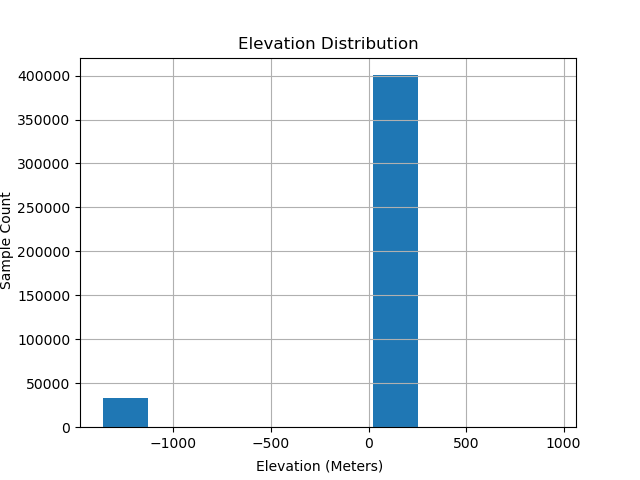

In [5]:
# Let's see the data distribution via a histogram
title = 'Elevation Distribution'
x_title = 'Elevation (Meters)'
y_title = 'Sample Count'

fig, axes = plt.subplots()
preib_gdf.hist('elevation', ax=axes)
plt.title(title, ha='center', fontsize='large')
fig.text(0.5, 0.02, x_title, ha='center')
fig.text(0.0, 0.5, y_title, va='center', rotation='vertical')

Noticing some unphysical negative values as well as large outliers we remove them for plotting purposes and replot the histogram.

In [6]:
# As we could see, there are plenty of outliers, if we just want a clean view we can just discard them.
# For a more correct approach to these outliers we could use the 2 sigma method.
preib_gdf = preib_gdf[(preib_gdf['elevation'] > -10) & (preib_gdf['elevation'] < 400)]

Text(0.0, 0.5, 'Sample Count')

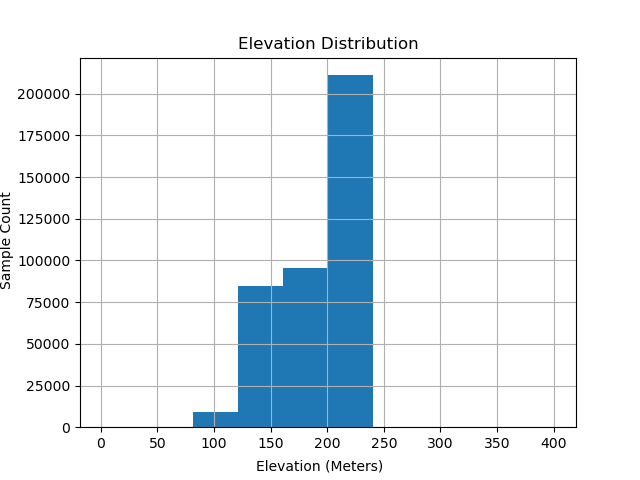

In [7]:
# Now the histogram for our "corrected" dataframe.
fig, axes = plt.subplots()
preib_gdf.hist('elevation', ax=axes)
plt.title(title, ha='center', fontsize='large')
fig.text(0.5, 0.02, x_title, ha='center')
fig.text(0.0, 0.5, y_title, va='center', rotation='vertical')

In a similar way this is done for the ICESat/GLAS data in the next couple of code blocks.

Text(0.0, 0.5, 'Sample Count')

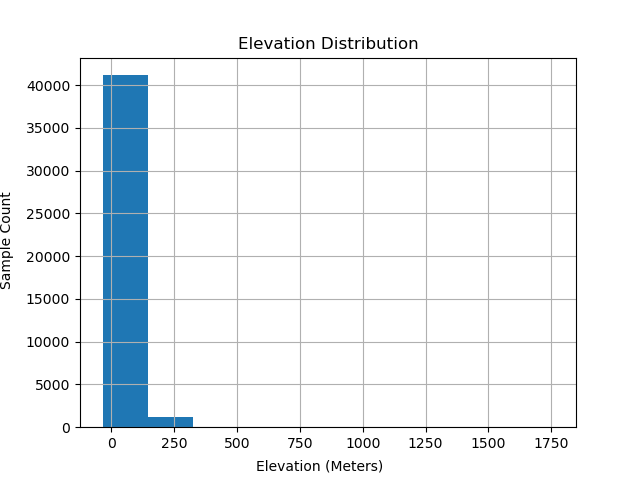

In [8]:
# we do the same for our ICESat/GLAS dataframe
fig, axes = plt.subplots()
glas_gdf.hist('elevation', ax=axes)
plt.title(title, ha='center', fontsize='large')
fig.text(0.5, 0.02, x_title, ha='center')
fig.text(0.0, 0.5, y_title, va='center', rotation='vertical')

Text(0.0, 0.5, 'Sample Count')

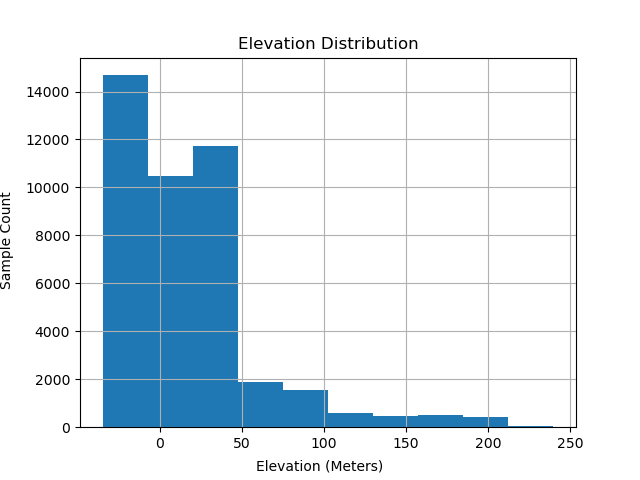

In [9]:
glas_gdf = glas_gdf[glas_gdf['elevation'] < 400]
#print the normalized dataframe histogram.
fig, axes = plt.subplots()
glas_gdf.hist('elevation', ax=axes)
plt.title(title, ha='center', fontsize='large')
fig.text(0.5, 0.02, x_title, ha='center')
fig.text(0.0, 0.5, y_title, va='center', rotation='vertical')

### Plotting Data

You can now either plot the two data sets separately:

Or, and that is the **beauty of the *IceFlow* library**, you can easily stack the two data sets and plot them overlapping in one figure!

<GeoAxesSubplot:>

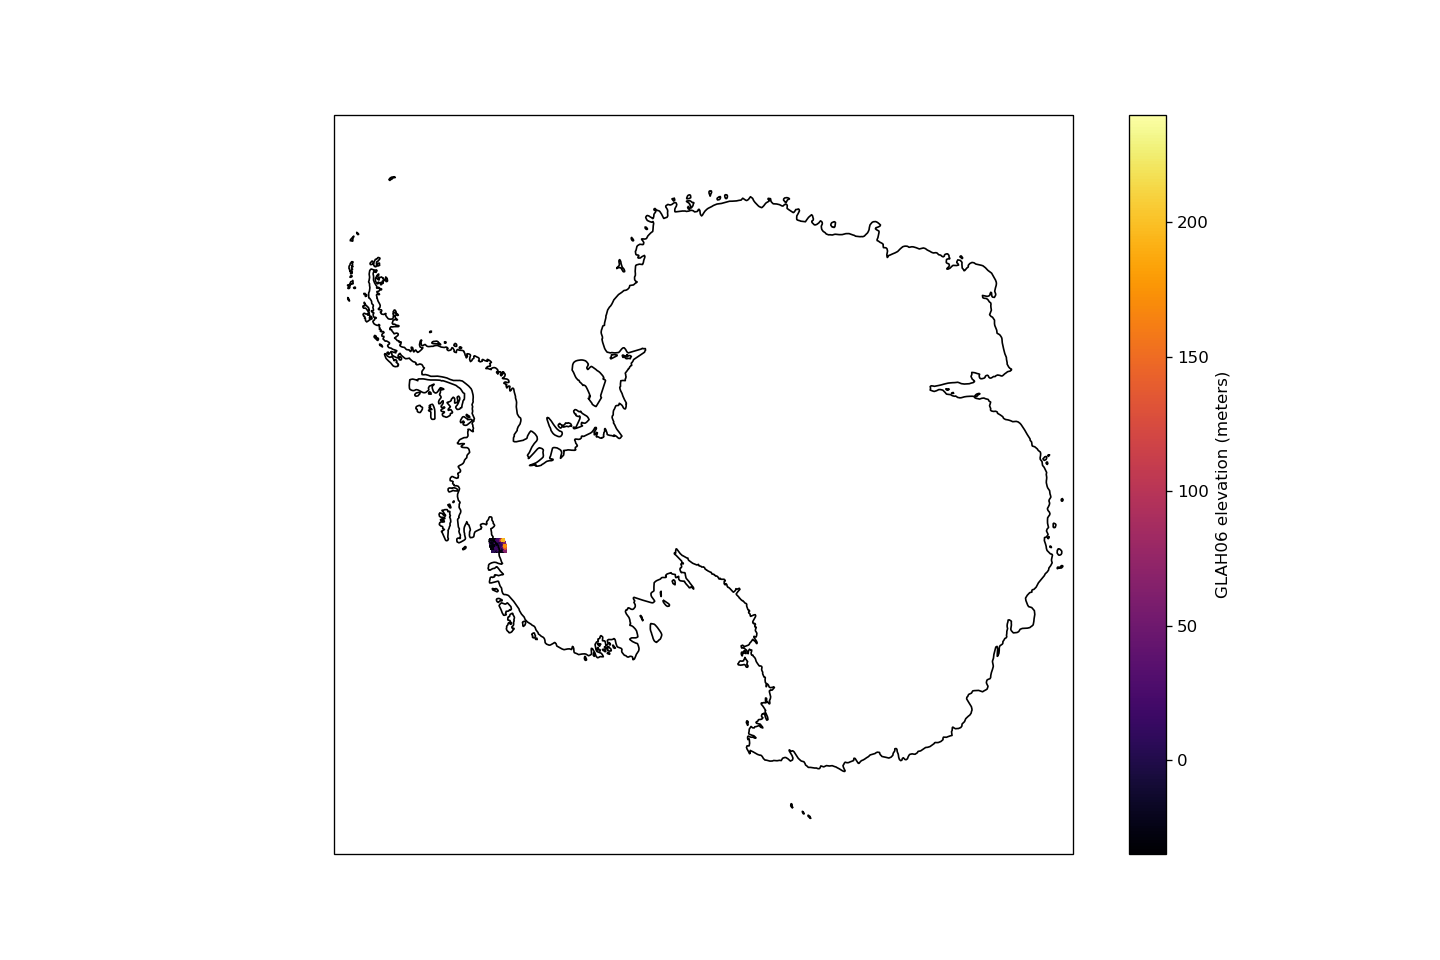

In [10]:
glas_gdf_3031 = glas_gdf.to_crs('EPSG:3031')
plt.figure(figsize=(12,8), dpi= 120)
ax = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=0)) 
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax.set_extent([-180, 180, -65, -90], ccrs.PlateCarree())
glas_gdf_3031.plot(column='elevation',
              ax=ax,
              markersize=1,
              cmap='inferno',
              legend=True,
              legend_kwds={'label':'GLAH06 elevation (meters)'})

In [11]:
# We overlap our ATM1B dataframe on the plot above, you can zoom in to see where they overlap.
# Here you can notice the difference in density between the 2 datasets.
preib_gdf_3031 = preib_gdf.to_crs('EPSG:3031')
preib_gdf_3031.plot(ax=ax,
                    column='elevation',
                    markersize=1,
                    cmap='viridis',
                    legend=True,
                    legend_kwds={'label':'ATM1B elevation (meters)'})
plt.tight_layout()

### Plotting Multiple Years of Point Cloud Data

In [ ]:
# We group our dataframe by year
glas_by_year = glas_gdf.groupby([(glas_gdf.index.year)])

for key, group in glas_by_year:
     group.plot(column='elevation',
                markersize=0.5,
                label=key,
                legend=True,
                legend_kwds={'label':f'GLAH06 {key} elevation (meters)'})

In [ ]:
# We can also stack 2 or more geopandas dataframes to have a unified dataframe for analysis.
stacked_df = gpd.GeoDataFrame(pd.concat( [preib_gdf, glas_gdf]))
display(stacked_df.head(), stacked_df.shape)

# 7. Conclusions and Future Work


# 8. References
1. [Airborne Topographic Mapper Calibration Procedures and Accuracy Assessment](https://ntrs.nasa.gov/archive/nasa/casi.ntrs.nasa.gov/20120008479.pdf)
2. [Open Source Tools for Point Cloud Processing, Storage, Subsetting, and Visualization](https://sea.ucar.edu/sites/default/files/kbeam_seaconf18.pdf)

# 9. Related Tools

* [OpenAltimetry](https://openaltimetry.org/): Advanced discovery, processing, and visualization services for ICESat and ICESat-2 altimeter data
* [ITS_LIVE](https://its-live.jpl.nasa.gov/):A NASA MEaSUREs project to provide automated, low latency, global glacier flow and elevation change data sets. 